In [1]:
import numpy as np
from bayesian_agent import BayesianReplica
from estimate_agent import estimate_agent, find_mu
import pandas as pd
from concat_mean import concat_mean
from data_gen_meanPrior import data_gen_meanPrior
from data_gen_varPrior import data_gen_varPrior
from concat_var_mle import concat_var_mle
import matplotlib.pyplot as plt

In [2]:

# data_gen_meanPrior()


In [3]:
file_list = ['26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41']
file_list_temp = ['58', '59', '60', '61', '62', '63']


In [4]:
for file_id in file_list_temp:
    file = f'../experiment_results ({file_id}).csv'
    mean = find_mu(file)
    # data_gen_varPrior(mean, out_path=f'var_mean_exp5_data_{file_id}.csv')



[INFO] Loaded 10050 total trials from 1 files.

[INFO] Unique S2_val: [0]
[INFO] Unique S2_std: [8]
[INFO] Example S1_std values: [2] ...

[INFO] Saved combined psychometric data to: combined_psychometric_data_mean.csv
   S1_std  S2_std  S2_val  S1_val  P_choose1  N_trials
0       2       8       0   -10.0       0.16        50
1       2       8       0    -9.9       0.12        50
2       2       8       0    -9.8       0.12        50
3       2       8       0    -9.7       0.08        50
4       2       8       0    -9.6       0.14        50

[INFO] Unique S1_std in combined data: [2]
   S1_val  P_choose1  N_trials
0   -10.0       0.16      50.0
1    -9.9       0.12      50.0
2    -9.8       0.12      50.0
3    -9.7       0.08      50.0
4    -9.6       0.14      50.0
[INFO] Loaded 10050 total trials from 1 files.

[INFO] Unique S2_val: [0]
[INFO] Unique S2_std: [8]
[INFO] Example S1_std values: [2] ...

[INFO] Saved combined psychometric data to: combined_psychometric_data_mean.csv
  

In [5]:
# file = '../experiment_results (70).csv'
# mean = find_mu(file)
# data_gen_varPrior(mean, out_path='var_mean_exp5_data_58.csv')

In [6]:
file_list_2 = ['42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57']
file_list_2_temp = ['64', '65', '66', '67', '68', '69']
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

mu_list = []
sigma_list = []
internal_std_list = []
for i in range(len(file_list_2)):
    file = f'../experiment_results ({file_list[i]}).csv'
    mean = find_mu(file)
    file_id = file_list_2[i]
    file = f'../experiment_results ({file_id}).csv'
    data = concat_var_mle(file)
    mu_prior, sigma_prior_mle, sigma_internal_mle = estimate_agent(data, mean)
    mu_list.append(mu_prior)
    sigma_list.append(sigma_prior_mle)
    internal_std_list.append(sigma_internal_mle)

for i in range(len(file_list_2_temp)):
    file_id = file_list_temp[i]
    file = f'../experiment_results ({file_id}).csv'
    mean = find_mu(file)
    file_id = file_list_2_temp[i]
    file = f'../experiment_results ({file_id}).csv'
    data = concat_var_mle(file)
    mu_prior, sigma_prior_mle, sigma_internal_mle = estimate_agent(data, mean)
    mu_list.append(mu_prior)
    sigma_list.append(sigma_prior_mle)
    internal_std_list.append(sigma_internal_mle)


[INFO] Loaded 10050 total trials from 1 files.

[INFO] Unique S2_val: [0]
[INFO] Unique S2_std: [8]
[INFO] Example S1_std values: [2] ...

[INFO] Saved combined psychometric data to: combined_psychometric_data_mean.csv
   S1_std  S2_std  S2_val  S1_val  P_choose1  N_trials
0       2       8       0   -10.0       0.00        50
1       2       8       0    -9.9       0.04        50
2       2       8       0    -9.8       0.02        50
3       2       8       0    -9.7       0.00        50
4       2       8       0    -9.6       0.02        50

[INFO] Unique S1_std in combined data: [2]
   S1_val  P_choose1  N_trials
0   -10.0       0.00      50.0
1    -9.9       0.04      50.0
2    -9.8       0.02      50.0
3    -9.7       0.00      50.0
4    -9.6       0.02      50.0
[INFO] Loaded 10050 total trials from 1 files.

[INFO] Unique S2_val: [0]
[INFO] Unique S2_std: [8]
[INFO] Example S1_std values: [2] ...

[INFO] Saved combined psychometric data to: combined_psychometric_data_mean.csv
  

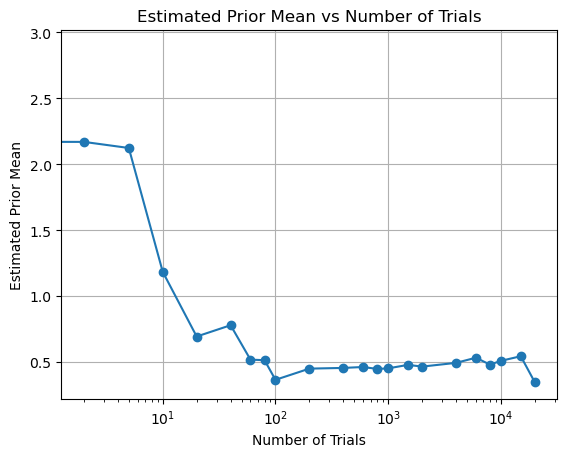

In [7]:


plt.plot(trials, mu_list, marker='o')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

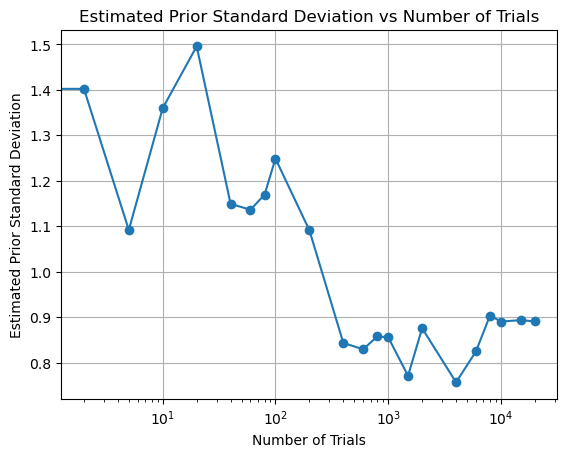

In [8]:


plt.plot(trials, sigma_list, marker='o')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Standard Deviation')
plt.title('Estimated Prior Standard Deviation vs Number of Trials')
plt.grid(True)
plt.show()

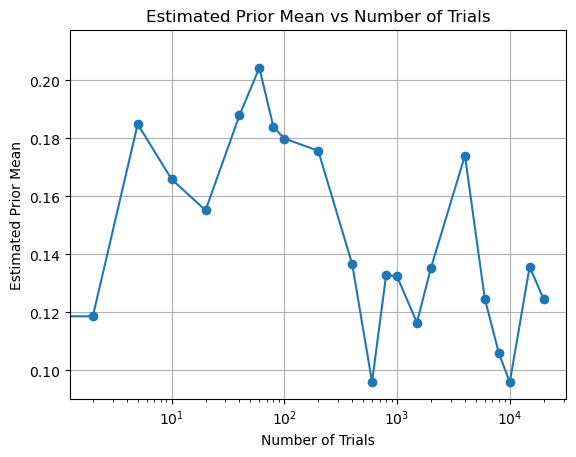

In [9]:
plt.plot(trials, internal_std_list, marker='o')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

In [ ]:
# def mse(mu_list, mu_list_agent):
#     mu_array = np.array(mu_list[:len(mu_list_agent)])  # match lengths
#     agent_array = np.array(mu_list_agent)
#     return np.mean((mu_array - agent_array) ** 2)

# def simulate_agent(mu_final, sigma_final, mu_init, sigma_init, internal_std, measurement_noise):
#     agent = BayesianReplica(mu_init, sigma_init, internal_std)
#     mu_list_agent = []
    
#     for n_trials in trials:
#         mu_prior, sigma_prior = agent.get_prior()
#         mu_list_agent.append(mu_prior)
#         agent.reset_agent()
#         agent.train_agent_kalmann_m_noise_z_var(n_trials, mu_final, sigma_final, measurement_noise)
    
#     return mu_list_agent

# from scipy.optimize import minimize_scalar

# def objective(noise):
    
#     mse_total = 0
#     for _ in range(10):
#         mu_list_agent = simulate_agent(0.48, 0.87, 2.89, 1.136, 0.15, noise)
#         mse_value = mse(mu_list, mu_list_agent)
#         mse_total += mse_value
#     mse_avg = mse_total / 10
#     return mse_avg

# res = minimize_scalar(objective, bounds=(0.1, 10.0), method='bounded')
# best_noise = res.x
# print("Best measurement noise:", best_noise)


AttributeError: 'BayesianReplica' object has no attribute 'train_agent_kalmann_m_noise_z_var'

In [ ]:
# def estimate_noise():
#     res = minimize_scalar(
#         objective,
#         bounds=(1.0, 3.0),
#         method='bounded'
#     )
#     return res.x

# n_boot = 100         # 200–500 is usually enough
# noise_boot = np.zeros(n_boot)

# for b in range(n_boot):
#     noise_boot[b] = estimate_noise()


# alpha = 0.05

# ci_low = np.percentile(noise_boot, 100 * alpha / 2)
# ci_high = np.percentile(noise_boot, 100 * (1 - alpha / 2))

# print(f"Measurement noise estimate: {best_noise:.4f}")
# print(f"95% bootstrap CI: [{ci_low:.4f}, {ci_high:.4f}]")

KeyboardInterrupt: 

In [ ]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

print(mu_init, sigma_init)
print(mu_final, sigma_final)
internal_std = np.mean(internal_std_list)
print(internal_std)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for n_trials in trials:
    mu_prior, sigma_prior = agent.get_prior()
    mu_list_agent.append(mu_prior)
    sigma_list_agent.append(sigma_prior)
    agent.reset_agent()
    agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)


2.8945122955198297 1.1368488457049677
0.4810689507469355 0.8777130417703917
0.1490479306661544


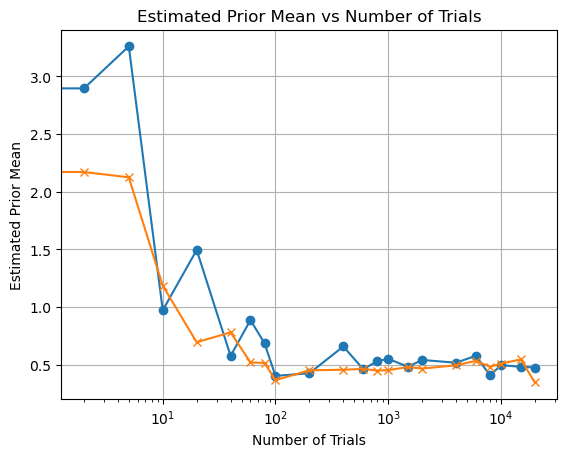

In [ ]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

In [ ]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])
print(sigma_final)
internal_std = np.mean(internal_std_list)
measurement_noise =2

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
k=50
for n_trials in trials:
    mu_prior, sigma_prior = agent.get_prior()
    mu_list_agent.append(mu_prior)
    sigma_list_agent.append(sigma_prior)
    agent.reset_agent()
    agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
    agent.train_agent_EKF_absolute(n_trials, mu_final, sigma_final, measurement_noise)

0.8777130417703917


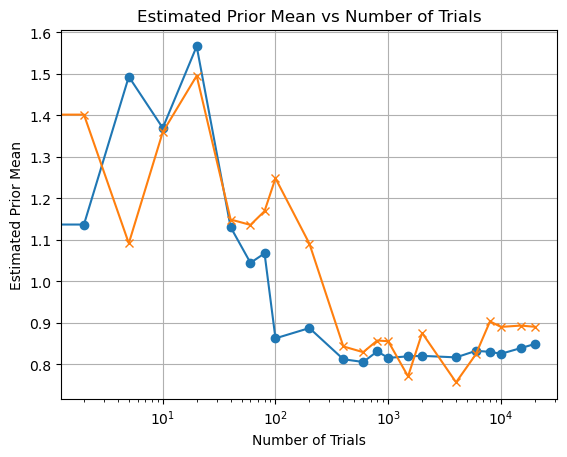

In [ ]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

In [ ]:
def mse(true_list, pred_list):
    # Make sure both lists have the same length
    min_len = min(len(true_list), len(pred_list))
    return np.mean((np.array(true_list[:min_len]) - np.array(pred_list[:min_len]))**2)

In [ ]:
k_values = np.linspace(1, 100, 20)  # Try 20 values from 1 to 100, adjust range as needed
best_k = None
lowest_mse = float('inf')

for k in k_values:
    agent = BayesianReplica(mu_init, sigma_init, internal_std)
    mu_list_agent = []
    sigma_list_agent = []

    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent.append(mu_prior)
        sigma_list_agent.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
        agent.train_agent_EKF_absolute(n_trials, mu_final, sigma_final, measurement_noise, k)

    current_mse = mse(sigma_list, sigma_list_agent)
        
    if current_mse < lowest_mse:
        lowest_mse = current_mse
        best_k = k

print("Best k:", best_k)
print("Lowest MSE:", lowest_mse)


Best k: 1.0
Lowest MSE: 0.08583414231059106
